# From Rows to Lists, Arrays, and DataFrames

## Iterating Over Rows to Analyze Data

So far we have learned how to iterate through the rows of a file in order to process each row, one at a time.  It has its limitations.  In this session we compare working with iteration over rows, to two alternatives: generating lists from the rows, and generating arrays using Numpy.  We close with an introduction to the pandas package, which we will begin using extensively.

Let's reload our rainfall data from last time to practice with it.

Now let's say we need to compute the mean, min and max of these numbers.  

In [1]:
import csv
with open('data/rain.csv', 'r') as csvfile:
    
    # initialize a counter and variables to contain our descriptive stats
    count = 0 #at the end, divide cumulative_sum by this to get the mean
    cumulative_sum = 0 #our rolling sum
    max_value = -1 #pick a really small number that's guaranteed to be less than the max
    min_value = 1000
    
    # open the file and skip the header row
    my_csv = csv.reader(csvfile)
    next(my_csv)
    
    # loop through each data row
    for row in my_csv:
        
        # rainfall amount is in column 1, only process this row's value if not an empty string
        if not row[1] == '':
            
            # increment the counter and extract this row's rainfall as a float
            count = count + 1
            rainfall = float(row[1])
            
            # add this row's rainfall to the cumulative sum
            cumulative_sum = cumulative_sum + rainfall
            
            # if this row's rainfall is greater than the current max value, update with the new max
            if rainfall > max_value:
                max_value = rainfall

            # if this row's rainfall is less than the current min value, update with the new min    
            if rainfall < min_value:
                min_value = rainfall

    # after looping through all the rows, divide the cumulative sum by the count and round to get the mean
    mean_value = round(cumulative_sum / count, 1)
    
    # print out the mean and max values
    print('mean:', mean_value, 'inches')
    print('max:', max_value, 'inches')
    print('min:', min_value, 'inches')

mean: 3.7 inches
max: 5.9 inches
min: 0.7 inches


#### Thought experiment: 
Can you think of a straightforward way to get the median value of rainfall?

## Using Lists to Analyze Data

Some things that are hard in the row iteration approach above, become easier if we can keep all of the values in one object, like a list.

Let's revisit the problems above, by assembling the values from each row into a single list.

In [2]:
import csv
with open('data/rain.csv', 'r') as csvfile:
    x = []
    itemreader = csv.reader(csvfile)
    # Skip the header row
    next(itemreader)
    for row in itemreader:
        # keep only non-missing values
        if row[1] != '':
            x.append(float(row[1]))
x

[5.3, 5.4, 4.8, 4.7, 3.3, 1.2, 0.8, 0.7, 3.9, 4.5, 5.9]

X is now a single list object with all the values in the file, whereas initially we just had each row producing one list with one element in it (from one row), and then printing that, before recreating it with the value from the next row.  The iteration approach kept only one row at a time, and we could not easily do calculations like a median.

Using the list (x), we should now have an easier time with mean and median calculations, using list methods like sum and len, and sort:

In [3]:
mean = round(sum(x)/len(x),1)
print(mean)

3.7


We can solve the median problem (approximately) by sorting the list, and getting the value that is halfway through the list:

In [4]:
x.sort()
median = x[int(len(x)/2)]
print(median)

4.5


It is also simple to get the min and max, using built-in list indexes to get the first and last element from the sorted list:

In [5]:
min = x[0]
min

0.7

In [6]:
max = x[-1]
max

5.9

OK, this is progress.  Can we now do other math on the data, like multiply each value by 5?

In [7]:
y = x*5
print(y)

[0.7, 0.8, 1.2, 3.3, 3.9, 4.5, 4.7, 4.8, 5.3, 5.4, 5.9, 0.7, 0.8, 1.2, 3.3, 3.9, 4.5, 4.7, 4.8, 5.3, 5.4, 5.9, 0.7, 0.8, 1.2, 3.3, 3.9, 4.5, 4.7, 4.8, 5.3, 5.4, 5.9, 0.7, 0.8, 1.2, 3.3, 3.9, 4.5, 4.7, 4.8, 5.3, 5.4, 5.9, 0.7, 0.8, 1.2, 3.3, 3.9, 4.5, 4.7, 4.8, 5.3, 5.4, 5.9]


Not what we wanted. That just concatenated 5 copies of the list together!

Let's take a different approach.

In [8]:
y = []
for item in range(len(x)):
    y.append(x[item]*5)
y

[3.5, 4.0, 6.0, 16.5, 19.5, 22.5, 23.5, 24.0, 26.5, 27.0, 29.5]

Alright, this is a big improvement over the iteration over rows approach, but it is still a bit tedious.

## Using Numpy to Analyze Data

Now let's review the use of arrays, the basic data structure added by Numpy.

We can convert our list (once we have iterated through the file to create it) to a Numpy array:

In [9]:
import numpy as np

rain = np.array(x)
rain

array([ 0.7,  0.8,  1.2,  3.3,  3.9,  4.5,  4.7,  4.8,  5.3,  5.4,  5.9])

In [10]:
type(rain)

numpy.ndarray

In [11]:
rain.dtype

dtype('float64')

A lot of mathematical methods are readily built in to Numpy.  Here are a few for mean, standard deviation, variance, median, min, max, sum.

In [12]:
round(np.mean(rain),1)

3.7000000000000002

In [13]:
np.std(rain)

1.8339317831162552

In [14]:
np.var(rain)

3.3633057851239672

In [15]:
np.median(rain)

4.5

In [16]:
np.min(rain)

0.69999999999999996

In [17]:
np.max(rain)

5.9000000000000004

In [18]:
np.sum(rain)

40.5

Much easier than coding for loops and counters, don't you think?  And a lot faster on large datasets, too.

Numpy also integrates very well with Matplotlib to generate charts.  Let's look at a sorted list of the elements in the array.

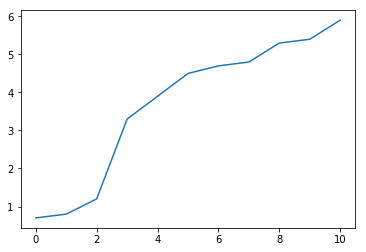

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(np.sort(rain))

# Introducing Pandas

We have moved from processing file with iterators over rows, to lists with iterators, to using Numpy arrays to do vectorized operations that are much faster and are also less complex to read, understand and to code. We moved from operating on one item in a list at a time, to operating on a whole array at one time. Now we want to be able to move to handling the whole table of data at once.

One of the problems we did not attempt to deal with using arrays, or lists, was how to keep rows of data together so that if we skip a missing value in one variable like price, it does not cause the other variables to be mis-aligned due to changes in the length of the array or list for one entry. This is one of many things that the pandas library does for us.
We skip forward a bit to Chapter 6 in Python for Data Analysis in order to learn how to load our data using pandas. Here is how:

In [20]:
import pandas as pd
df = pd.read_csv('data/rain.csv')
df

month_2014  rainfall_inches
0         jan              5.3
1         feb              5.4
2         mar              4.8
3         apr              4.7
4         may              3.3
5         jun              1.2
6         jul              0.8
7         aug              0.7
8         sep              NaN
9         oct              3.9
10        nov              4.5
11        dec              5.9

Notice a few things that have happened here.

1. The pd.read_csv has enough built-in smarts to read the first row of the file, get the variable names from it.
1. It then read all rows in the file, and used them to create a pandas DataFrame, which is like a set of Numpy arrays we can treat as a table.
1. It created an automatic unique index, beginning with zero.
1. It inferred the type of each variable from the data. 

Let's explore this pandas DataFrame to learn some of its features.  Note that a pandas Series is like one column of this DataFrame, coupled with its own index column.  So the main difference between a Series and a DataFrame is that the latter has multiple columns. Columns can be of different data types, but within a column, must be consistent.

In [21]:
df.shape

(12, 2)

In [22]:
df.columns

Index(['month_2014', 'rainfall_inches'], dtype='object')

In [23]:
df.dtypes

month_2014          object
rainfall_inches    float64
dtype: object

We can select subsets of the rows by indexing, and select specific columns by their name:

In [24]:
df['rainfall_inches'][:6]

0    5.3
1    5.4
2    4.8
3    4.7
4    3.3
5    1.2
Name: rainfall_inches, dtype: float64

We can get all of our statistics on the rainfall_inches column in one short command:

In [25]:
df['rainfall_inches'].describe()

count    11.000000
mean      3.681818
std       1.923444
min       0.700000
25%       2.250000
50%       4.500000
75%       5.050000
max       5.900000
Name: rainfall_inches, dtype: float64

Notice how it silently handled the missing value for September and gave the correct statistical results?

You can also get these values 'a la carte'.  You might recognize that these are essentially Numpy functions, but that in pandas we can now deal with multiple data types.

In [26]:
df['rainfall_inches'].min()

0.69999999999999996

In [27]:
df['rainfall_inches'].max()

5.9000000000000004

In [28]:
df['rainfall_inches'].median()

4.5

We can also do some plotting of the data without much effort:

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

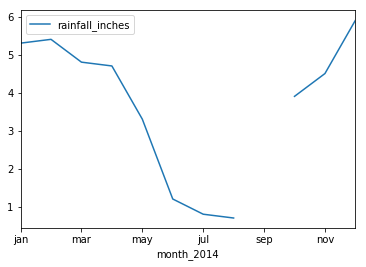

In [30]:
df.plot(y = 'rainfall_inches', x = 'month_2014')

### Slicing and indexing using loc and iloc

There are two indexing methods you can use to get subsets of rows and columns in a dataframe.  **loc** uses the values of the indices and includes the last value, whereas **iloc** uses the index positions and like usual Python indexing, does not include the last value. 

In [31]:
df.loc[0:6,:'rainfall_inches']

month_2014  rainfall_inches
0        jan              5.3
1        feb              5.4
2        mar              4.8
3        apr              4.7
4        may              3.3
5        jun              1.2
6        jul              0.8

In [32]:
df.iloc[0:6,0:2]

month_2014  rainfall_inches
0        jan              5.3
1        feb              5.4
2        mar              4.8
3        apr              4.7
4        may              3.3
5        jun              1.2

Note also that the 0th index position for columns is not the index column, but the first column of data in the dataframe, and the same applies for rows.

In [33]:
df.iloc[0:6,1:2]

rainfall_inches
0              5.3
1              5.4
2              4.8
3              4.7
4              3.3
5              1.2

### Filtering on values

You can easily filter a dataframe for one or more conditions based on the values in a column. Below we filter df to select only months with less than 4 inches of rainfall.  

In [34]:
df[df['rainfall_inches'] < 4]

month_2014  rainfall_inches
4        may              3.3
5        jun              1.2
6        jul              0.8
7        aug              0.7
9        oct              3.9

Notice the nested use of df.  What happens if you don't do that?

In [35]:
df['rainfall_inches'] < 4

0     False
1     False
2     False
3     False
4      True
5      True
6      True
7      True
8     False
9      True
10    False
11    False
Name: rainfall_inches, dtype: bool

You can also select rows based on the values of more than one column.  Just remember to nest the individual conditions within parentheses:

In [36]:
df[(df['month_2014']=='jan') & (df['rainfall_inches'] > 5)]

month_2014  rainfall_inches
0        jan              5.3

### Using string functions to filter a dataframe

We will get more into string functions in the next session, based on content in Chapter 7 of Python for Data Analysis.  But here is a preview of how you can use a string function applied to a column of data to filter the data.  Notice the **str** component of the syntax.

In [37]:
df[df['month_2014'].str.contains('j')]

month_2014  rainfall_inches
0        jan              5.3
5        jun              1.2
6        jul              0.8

You can even compute statistics on such a filtered set...

In [38]:
df[df['month_2014'].str.contains('j')]['rainfall_inches'].mean()

2.433333333333333

### Missing data

This filtering approach is handy when you want to eliminate missing data also.

In [39]:
df[df['rainfall_inches'].notnull()]

month_2014  rainfall_inches
0         jan              5.3
1         feb              5.4
2         mar              4.8
3         apr              4.7
4         may              3.3
5         jun              1.2
6         jul              0.8
7         aug              0.7
9         oct              3.9
10        nov              4.5
11        dec              5.9

Let's say we find the value for sep should be 2.5. How could we set that value using the loc indexing?

In [40]:
df.loc[8,'rainfall_inches'] = 2.5
df

month_2014  rainfall_inches
0         jan              5.3
1         feb              5.4
2         mar              4.8
3         apr              4.7
4         may              3.3
5         jun              1.2
6         jul              0.8
7         aug              0.7
8         sep              2.5
9         oct              3.9
10        nov              4.5
11        dec              5.9

### Getting unique value lists and counts

In [41]:
df['month_2014'].unique()

array(['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep',
       'oct', 'nov', 'dec'], dtype=object)

In [42]:
df['month_2014'].count()

12

### Sorting

In [43]:
df.sort_values(['rainfall_inches'], ascending = False)

month_2014  rainfall_inches
11        dec              5.9
1         feb              5.4
0         jan              5.3
2         mar              4.8
3         apr              4.7
10        nov              4.5
9         oct              3.9
4         may              3.3
8         sep              2.5
5         jun              1.2
6         jul              0.8
7         aug              0.7

## Working with Pandas -- an in-class working session

OK, let's create a DataFrame from a dictionary, following the example on pg 116 of Python for Data Analysis (PDA).

In [44]:
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada'], 'year': [2000, 2001, 2002, 2001, 2002],
'pop': [1.5, 1.7, 3.6, 2.4, 2.9]}
sp = pd.DataFrame(data)

Explain the contents and structure of 'data'

What does 'pd.DataFrame(data)' do? What if we did not begin that line with 'df ='?

Look at the contents of df, using just df by itself, and 'print df'.  

In [45]:
sp

pop   state  year
0  1.5    Ohio  2000
1  1.7    Ohio  2001
2  3.6    Ohio  2002
3  2.4  Nevada  2001
4  2.9  Nevada  2002

We can refer to a column in two ways:

In [46]:
sp['state']

0      Ohio
1      Ohio
2      Ohio
3    Nevada
4    Nevada
Name: state, dtype: object

In [47]:
sp.state

0      Ohio
1      Ohio
2      Ohio
3    Nevada
4    Nevada
Name: state, dtype: object

Generally it is preferable to be explicit and use the df['column'] approach.

We can step through the rows in a dataframe

In [48]:
for label in sp.state.index:
    print(sp.state[label])

Ohio
Ohio
Ohio
Nevada
Nevada


And find the index value within each entry of a specific substring

In [49]:
for label in sp.state.index:
    print(sp.state[label].find('io'))

2
2
2
-1
-1


In [50]:
for label in sp.state.index:
    if sp.state[label]=='Ohio':
        print(sp.state[label])
    else:
        print('Not Ohio')

Ohio
Ohio
Ohio
Not Ohio
Not Ohio


## Now Your Turn

Below are a series of questions, with the answers remaining for you to fill in by using pandas expressions that draw on the methods in Chapter 5.  You should not need to use anything more than the content of this chapter -- a subset of the methods summarized above, to do this exercise.  Hopefully you can complete it within class if you've been keeping up with the reading.

How can we get a quick statistical profile of all the numeric columns?

In [51]:
sp.describe()

pop        year
count  5.000000     5.00000
mean   2.420000  2001.20000
std    0.864292     0.83666
min    1.500000  2000.00000
25%    1.700000  2001.00000
50%    2.400000  2001.00000
75%    2.900000  2002.00000
max    3.600000  2002.00000

Can you get a profile of a column that is not numeric, like state? Try it.

In [52]:
sp['state'].describe()

count        5
unique       2
top       Ohio
freq         3
Name: state, dtype: object

How can we print the data types of each column?

In [53]:
sp.dtypes

pop      float64
state     object
year       int64
dtype: object

How can we print just the column containing state names?

In [54]:
sp['state']

0      Ohio
1      Ohio
2      Ohio
3    Nevada
4    Nevada
Name: state, dtype: object

How can we get a list of the states in the DataFrame, without duplicates?

In [55]:
sp['state'].unique()

array(['Ohio', 'Nevada'], dtype=object)

How can we compute the mean of population across all the rows?

In [56]:
sp['pop'].mean()

2.4200000000000004

How can we compute the maximum population across all the rows?

In [57]:
sp['pop'].max()

3.6000000000000001

How can we compute the 20th percentile value of population? 

In [58]:
sp['pop'].quantile(.2)

1.6600000000000001

How can we compute a Boolean array indicating whether the state is 'Ohio'?

In [59]:
sp['state']=='Ohio'

0     True
1     True
2     True
3    False
4    False
Name: state, dtype: bool

How can we select and print just the rows for Ohio?

In [60]:
sp[sp['state']=='Ohio']

pop state  year
0  1.5  Ohio  2000
1  1.7  Ohio  2001
2  3.6  Ohio  2002

How can we create a new DataFrame containing only the Ohio records?

In [61]:
new = sp[sp['state']=='Ohio']
new

pop state  year
0  1.5  Ohio  2000
1  1.7  Ohio  2001
2  3.6  Ohio  2002

How can we select and print just the rows in which population is more than 2?

In [62]:
sp[sp['pop']>2]

pop   state  year
2  3.6    Ohio  2002
3  2.4  Nevada  2001
4  2.9  Nevada  2002

How could we compute the mean of population that is in Ohio, averaging across years?

In [63]:
sp[sp['state']=='Ohio']['pop'].mean()

2.266666666666667

How can we print the DataFrame, sorted by State and within State, by Population?

In [64]:
sp.sort_values(['state','pop'])

pop   state  year
3  2.4  Nevada  2001
4  2.9  Nevada  2002
0  1.5    Ohio  2000
1  1.7    Ohio  2001
2  3.6    Ohio  2002

In [65]:
sp.dtypes

pop      float64
state     object
year       int64
dtype: object

How can we print the row for Ohio, 2002, selecting on its values (not on row and column indexes)?

In [66]:
sp[(sp['state']=='Ohio') & (sp['year'] == 2002)]

pop state  year
2  3.6  Ohio  2002

How can we use row and column indexing to set the population of Ohio in 2002 to 3.4?

In [67]:
sp.loc[2,'pop'] = 3.4
sp

pop   state  year
0  1.5    Ohio  2000
1  1.7    Ohio  2001
2  3.4    Ohio  2002
3  2.4  Nevada  2001
4  2.9  Nevada  2002